In [61]:
from main import main
import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

In [62]:
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [64]:
seeds = ['0.1', '0.2', '0.5']
precisions = {}
recalls = {}
f1_scores = {}
timings = {}

for s in seeds:
    with open("data/pkl/{seed}/precisions.pkl".format(seed=s), "rb") as f:
        precisions[s] = pickle.load(f)
    with open("data/pkl/{seed}/recalls.pkl".format(seed=s), "rb") as f:
        recalls[s] = pickle.load(f)
    with open("data/pkl/{seed}/f1_scores.pkl".format(seed=s), "rb") as f:
        f1_scores[s] = pickle.load(f)
    with open("data/pkl/{seed}/timings.pkl".format(seed=s), "rb") as f:
        timings[s] = pickle.load(f)

In [74]:
precision_means = {}
precision_stds = {}
last_iter = max(precisions[list(precisions.keys())[0]][0].keys())
for s in seeds:
    precision_means[s] = []
    precision_stds[s] = []
    for i in range(last_iter+1):
        iter_values = [val[i] for val in precisions[s]]
        precision_means[s].append(np.mean(iter_values))
        precision_stds[s].append(np.std(iter_values))

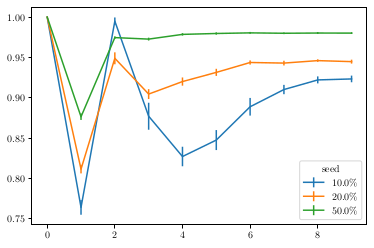

In [84]:
for s in seeds:
    plt.errorbar(range(last_iter+1), precision_means[s], yerr=precision_stds[s], label=str(float(s)*100)+"%")
plt.legend(title="seed")

In [49]:
recall_means = []
recall_stds = []
last_iter = max(recalls[0].keys())
for i in range(last_iter+1):
    iter_values = [val[i] for val in recalls]
    recall_means.append(np.mean(iter_values))
    recall_stds.append(np.std(iter_values))

<ErrorbarContainer object of 3 artists>

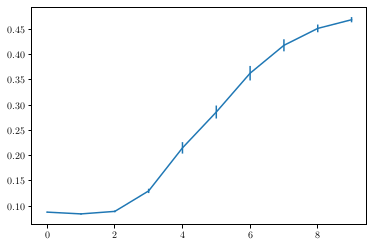

In [50]:
plt.errorbar(range(last_iter+1), recall_means, yerr=recall_stds)

In [51]:
f1_score_means = []
f1_score_stds = []
last_iter = max(f1_scores[0].keys())
for i in range(last_iter+1):
    iter_values = [val[i] for val in f1_scores]
    f1_score_means.append(np.mean(iter_values))
    f1_score_stds.append(np.std(iter_values))

<ErrorbarContainer object of 3 artists>

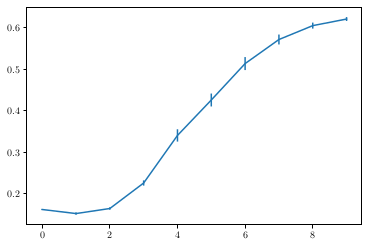

In [52]:
plt.errorbar(range(last_iter+1), f1_score_means, yerr=f1_score_stds)

<BarContainer object of 1 artists>

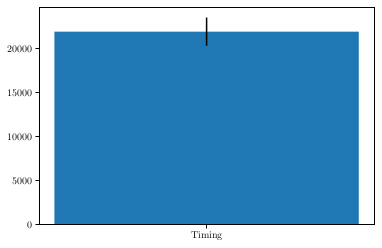

In [53]:
timings_mean = np.mean(timings)
timings_std = np.std(timings)
plt.bar("Timing", timings_mean, yerr=timings_std)

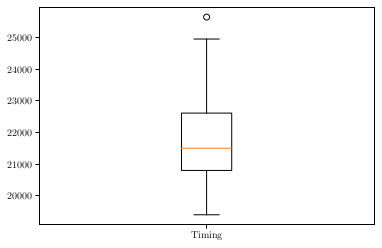

In [54]:
plt.boxplot(timings, labels=["Timing"]);

In [55]:
def bootstrap_metric(metric_list, n_iter):
    """Compute bootstrap means list to be used for computing confidence intervals
        using bootstrap resample"""
    means = []
    last_iter = max(metric_list[0].keys())
    metric_last = [val[last_iter] for val in metric_list]
    for i in range(n_iter):
        # Bootstrap
        metric_sample = np.random.choice(metric_last, size=len(metric_last), replace=True)
        means.append(np.mean(metric_sample))

    return means

In [56]:
def confidence_interval(means, conf_percent):
    # Computing low quantile (2.5 in our case)
    low_p = ((1.0 - conf_percent) / 2.0) * 100
    lower = np.percentile(means, low_p)

    # Computing high quantile
    high_p = (conf_percent + ((1.0 - conf_percent) / 2.0)) * 100
    upper = np.percentile(means, high_p)

    return [lower, upper]

In [57]:
means_precision = bootstrap_metric(precisions, 1000)

In [58]:
interval = confidence_interval(means_precision, 0.95)
print(interval)

[0.9189339757003613, 0.922121845796944]


In [59]:
def plot_confidence(means_metric, interval):
    # Computing the mean error
    mean = np.mean(means_metric)

    # Plot scores
    plt.hist(means_metric, bins=25)

    # Plot of two interval lines
    plt.axvline(interval[0], color='k', linestyle='dashed', linewidth=1)
    plt.axvline(interval[1], color='k', linestyle='dashed', linewidth=1)
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=1)

    plt.title("95.0 % confidence interval")
    plt.xlabel("A certain metric mean")
    plt.ylabel("Count")

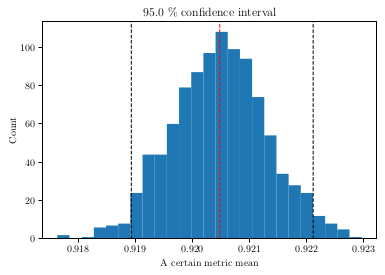

In [60]:
plot_confidence(means_precision, interval)